In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Read the data
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


# Exploratory Data Analysis

In [3]:
# Check the missing value
df_train.isnull().sum().sort_values(ascending=False)

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [4]:
df_train.shape

(136429, 14)

In [5]:
df_train['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

there are three types of machines L, M and H

In [6]:
# Check duplicated data
df_train.duplicated().sum()

0

<AxesSubplot:xlabel='Type', ylabel='count'>

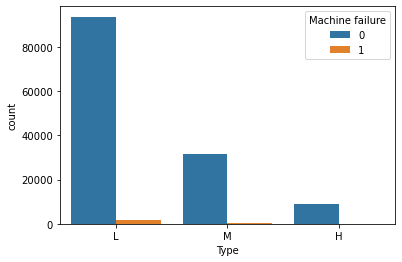

In [7]:
sns.countplot(data=df_train, x="Type", hue="Machine failure")

based on the bar chart, type L machines are the most numerous in this dataset

In [8]:
# View the failure machine in dataset
failed_machine_product = df_train[df_train['Machine failure'] == 1]
failed_machine_product

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
130,130,L52498,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
164,164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
228,228,M17895,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
236,236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
247,247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135902,135902,L52669,L,302.6,312.1,1638,35.0,215,1,1,0,0,0,0
135917,135917,L56200,L,297.3,308.2,1553,33.5,208,1,1,0,0,0,0
135957,135957,L55410,L,299.1,310.6,1353,49.7,74,1,0,0,0,0,0
136053,136053,H34965,H,302.4,312.0,1286,62.3,162,1,0,0,1,0,0


In [9]:
df_train[['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Tool wear [min]']].groupby('Type').max()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min]
Type,,,,
H,304.4,313.6,2833,246
L,304.4,313.8,2886,251
M,304.4,313.8,2886,253


In [10]:
# Average of air temperature, process temperature, rotational spd and tool wear of the normal machine and failed machine
df_train[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Tool wear [min]','Machine failure']].groupby('Machine failure').mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min]
Machine failure,,,,
0,299.846820,309.935645,1521.399148,103.952234
1,300.860242,310.280214,1453.563315,132.957169


In [11]:
# discard unused columns
unused_column = ['id','Product ID']
df_train = df_train.drop(unused_column,axis=1)

In [14]:
# categorical feature for Type column label in train dataset
le = preprocessing.LabelEncoder()
le.fit(df_train['Type'])
df_train['Type'] = le.transform(df_train['Type'])

In [15]:
# Data splitting
X_train = df_train.drop('Machine failure',axis=1)
y_train = df_train['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                   y_train,
                                                   test_size=0.2,
                                                   random_state=0)

In [16]:
X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
131389,1,302.5,311.1,1389,53.5,135,0,0,0,0,0
50495,1,301.0,312.0,1675,30.7,113,0,0,0,0,0
37400,1,300.7,310.5,1541,36.0,194,0,0,0,0,0
89228,0,303.3,312.6,1611,35.0,125,0,0,0,0,0
36393,2,298.6,309.5,1426,45.4,36,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41993,1,298.2,307.9,1510,47.9,2,0,0,0,0,0
97639,2,297.4,308.7,1798,36.2,135,0,0,0,0,0
95939,1,301.8,310.9,1359,54.6,182,0,0,0,1,0
117952,2,298.1,310.2,1517,40.7,148,0,0,0,0,0


# Model Training and Evaluation

## Logistic Regression

In [17]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26844
           1       0.99      0.71      0.83       442

    accuracy                           1.00     27286
   macro avg       0.99      0.85      0.91     27286
weighted avg       1.00      1.00      0.99     27286



<AxesSubplot:>

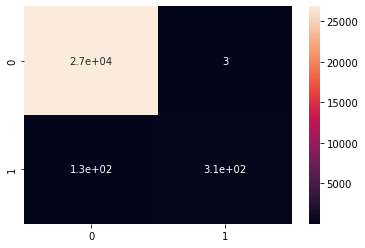

In [19]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

## Gaussian Naive Bayes 

In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26844
           1       0.84      0.80      0.82       442

    accuracy                           0.99     27286
   macro avg       0.92      0.90      0.91     27286
weighted avg       0.99      0.99      0.99     27286



<AxesSubplot:>

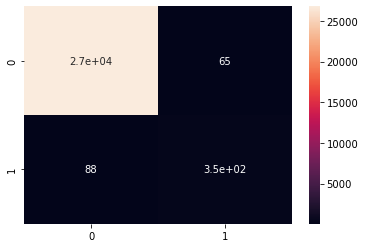

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [23]:
# Read test dataset
df_test = pd.read_csv('test.csv')

# categorical feature for Type column label in test dataset
le.fit(df_test['Type'])
df_test['Type'] = le.transform(df_test['Type'])

# separate the "id" column and delete columns that are not used in the test dataset
id = df_test['id'] 
test_data = df_test.drop(unused_column,axis=1)

In [25]:
# Make predictions with the naive Bayes model on the test dataset
test_pred = nb_model.predict(test_data)

# Save prediction results in CSV format
test_pred_df = pd.DataFrame(test_pred)
test_pred_df = test_pred_df.rename(columns={0: "Machine failure"})
test_pred_df = pd.concat([id, test_pred_df], axis=1)
test_pred_df.to_csv('submission.csv', index=False)

In [26]:
# Read the prediction results file
submission = pd.read_csv('submission.csv')

In [27]:
submission.head()

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
